In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/canser/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  3  61]]


0.9590643274853801

In [8]:
# Doğruluk oranını yazdır
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Doğruluk Oranı: {accuracy}')

Test Doğruluk Oranı: 0.9590643274853801


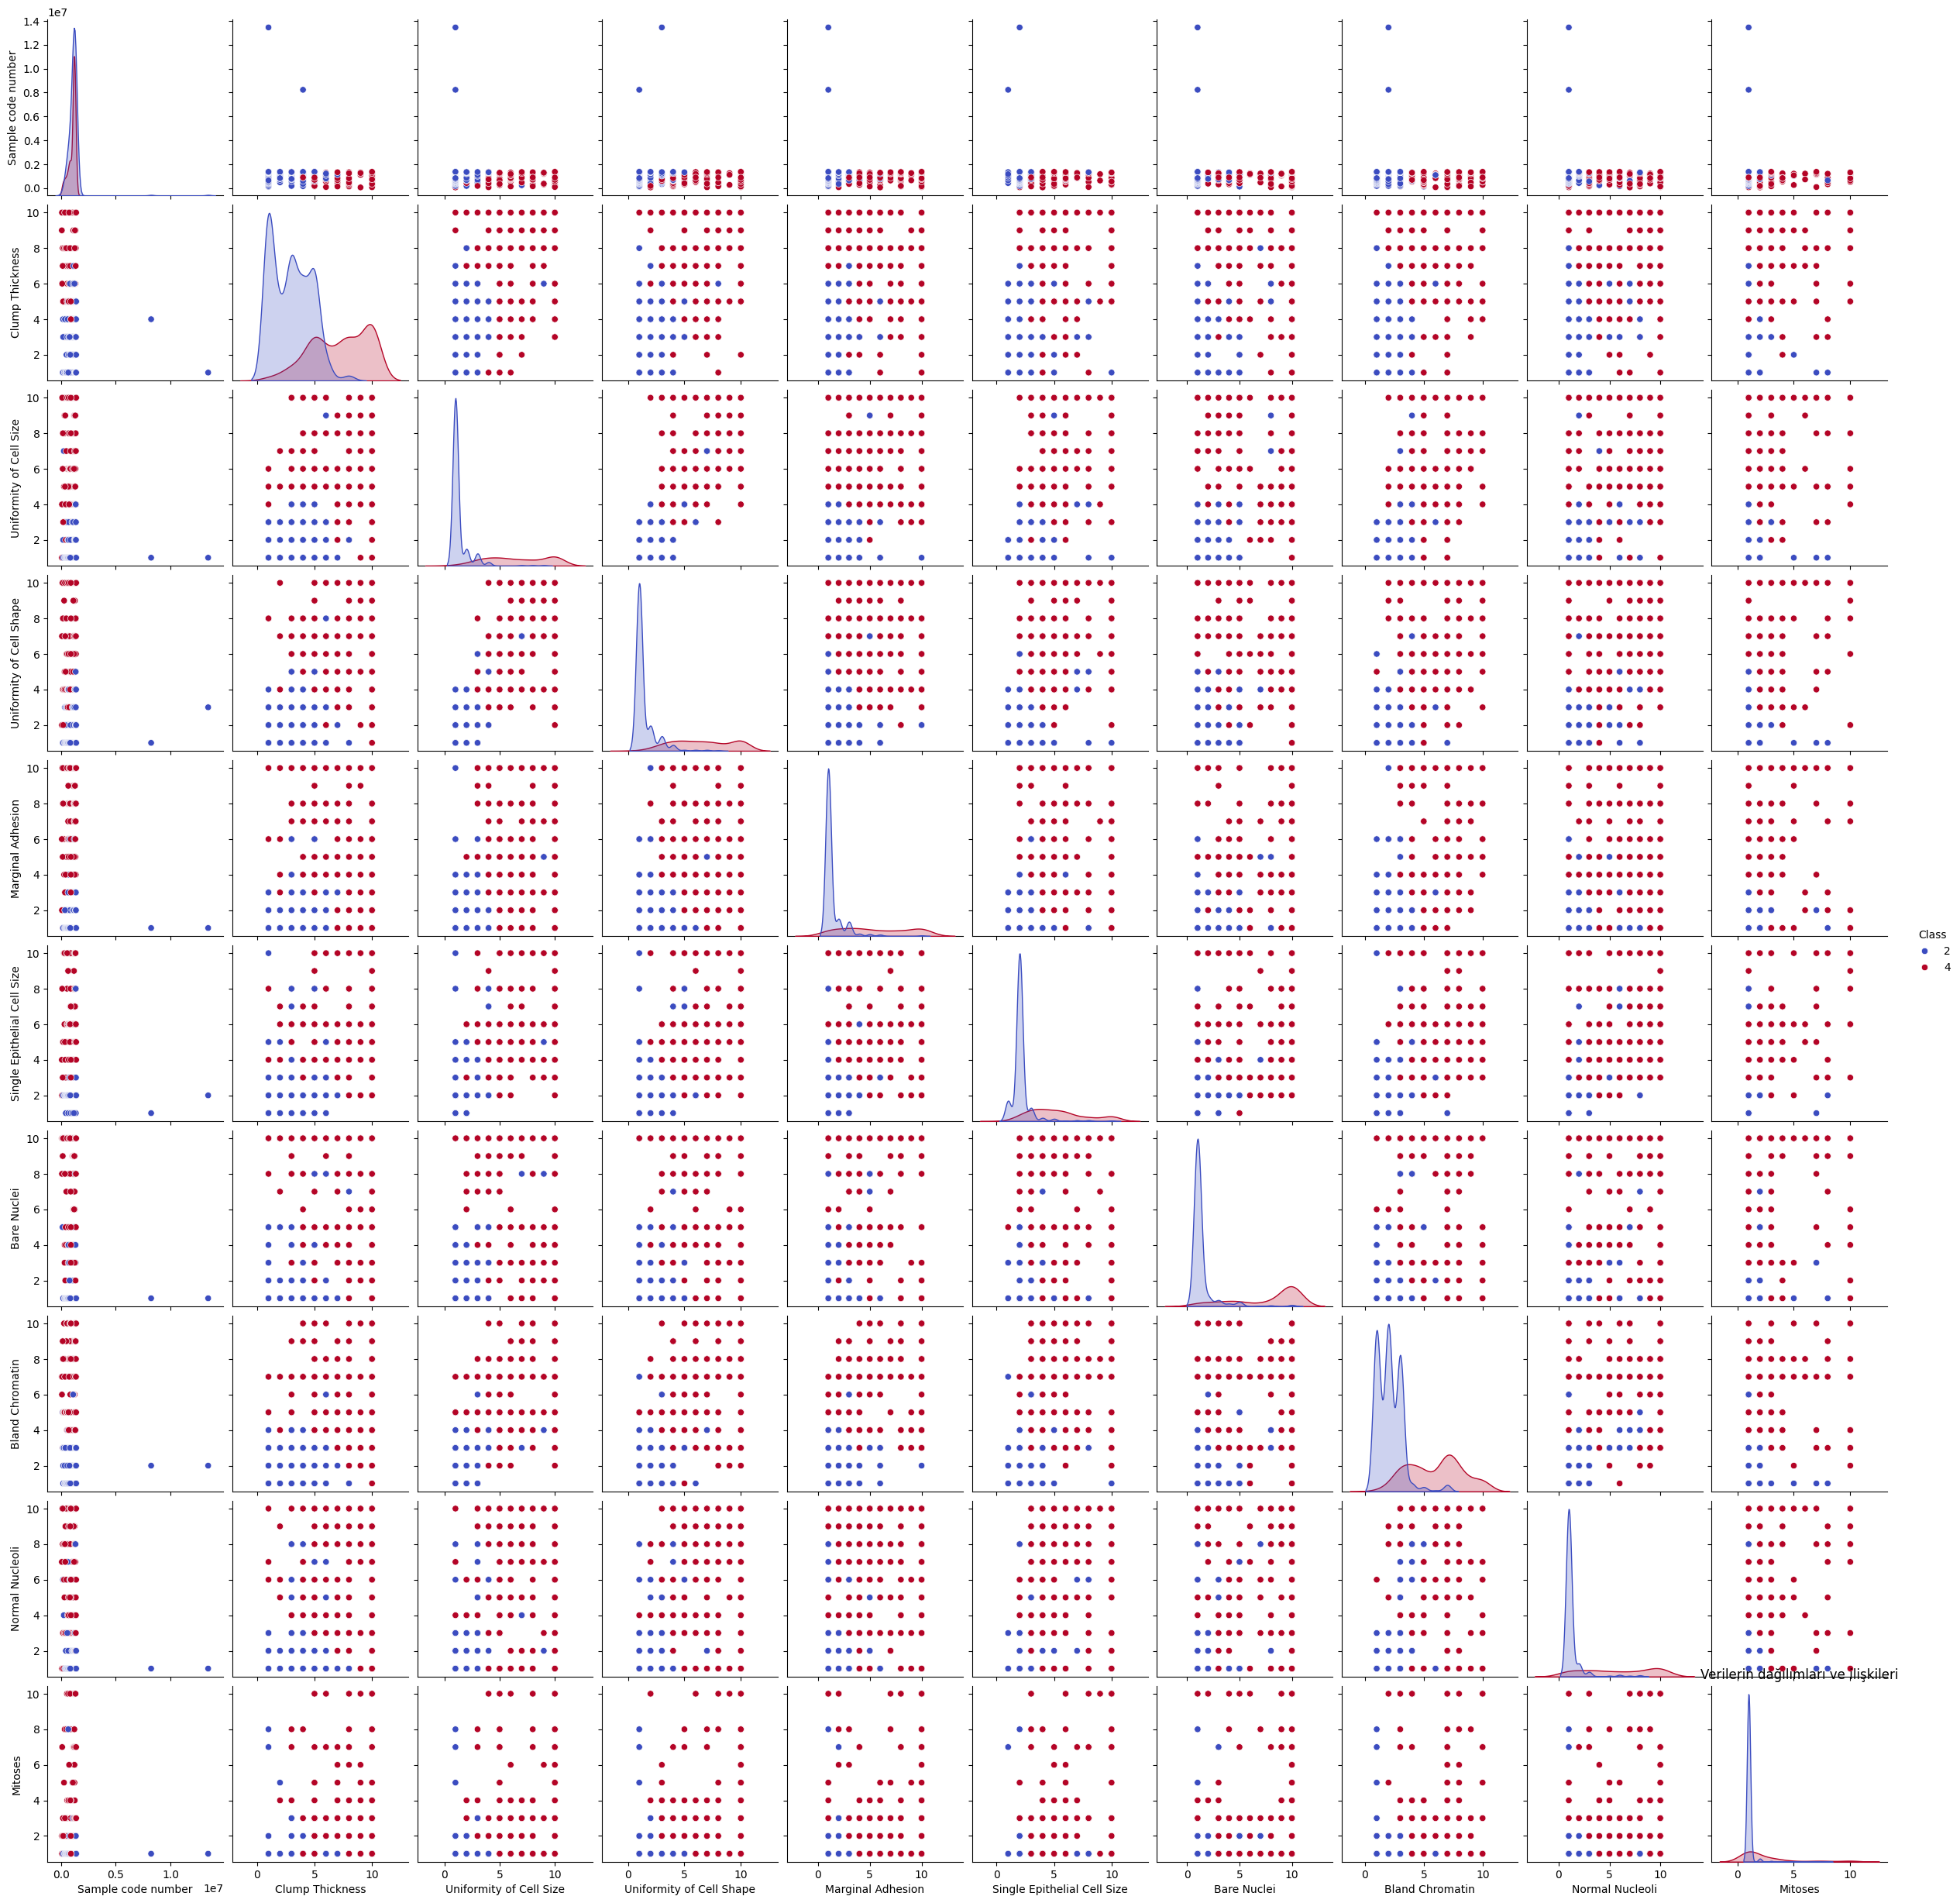

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#peirplot ile veri dağılımını ve ilişkilerini göster
sns.pairplot(dataset, hue='Class', palette='coolwarm')
plt.title('Verilerin dağılımları ve ilişkileri')
plt.show()

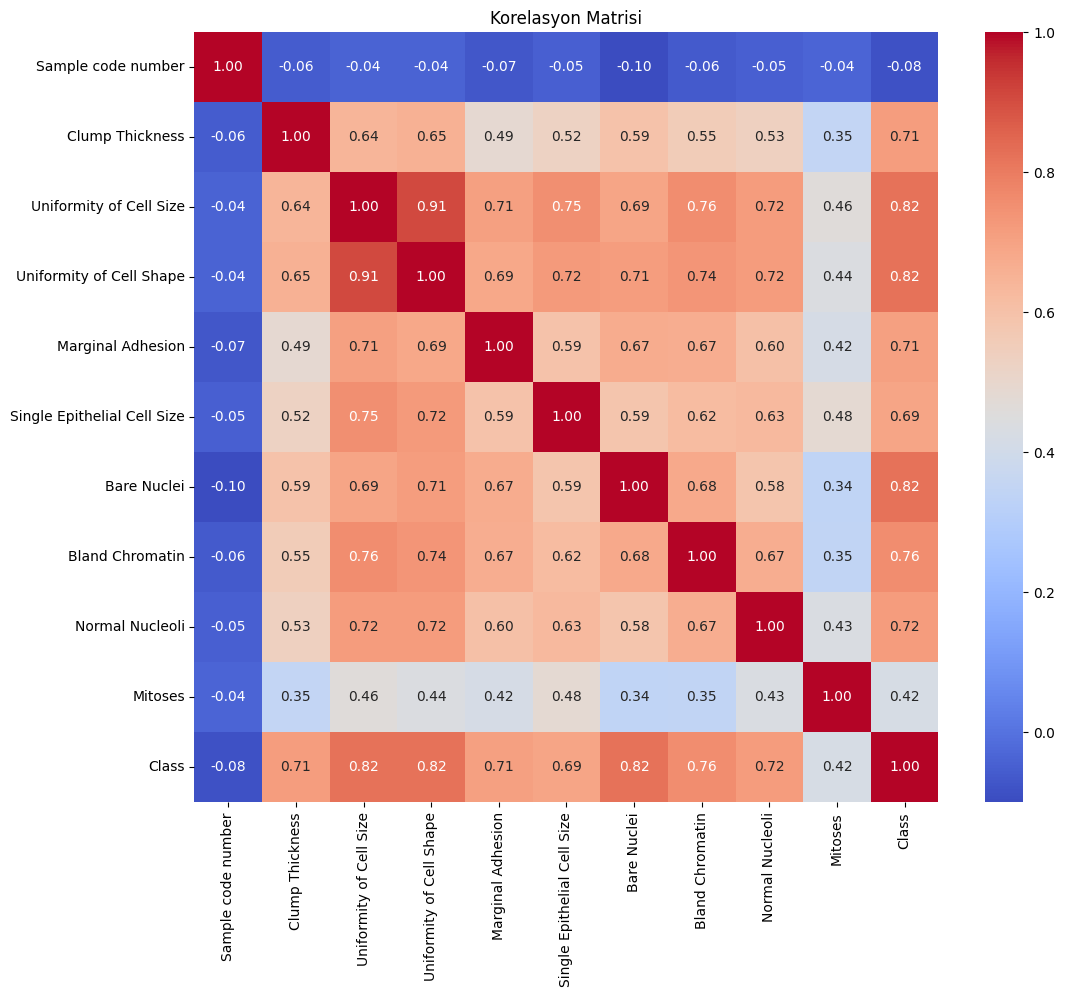

In [10]:
correlation_matris = dataset.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matris, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Korelasyon Matrisi')
plt.show()

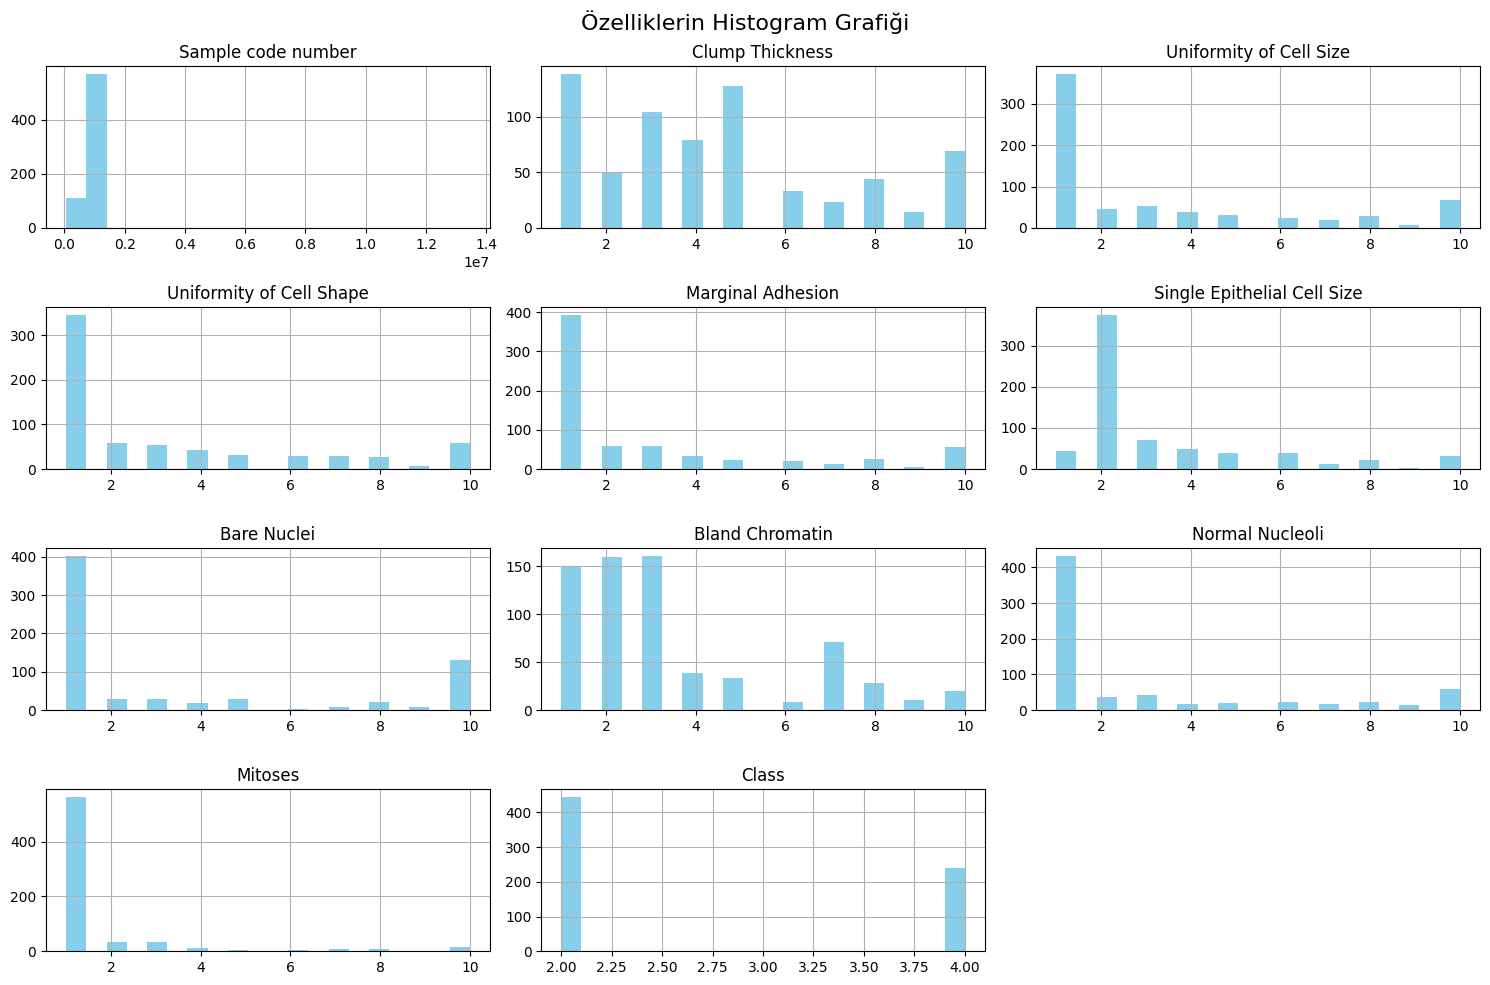

<ipython-input-11-1630a8d1d562>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-11-1630a8d1d562>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-11-1630a8d1d562>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
<ipython-input-11-1630a8d1d562>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

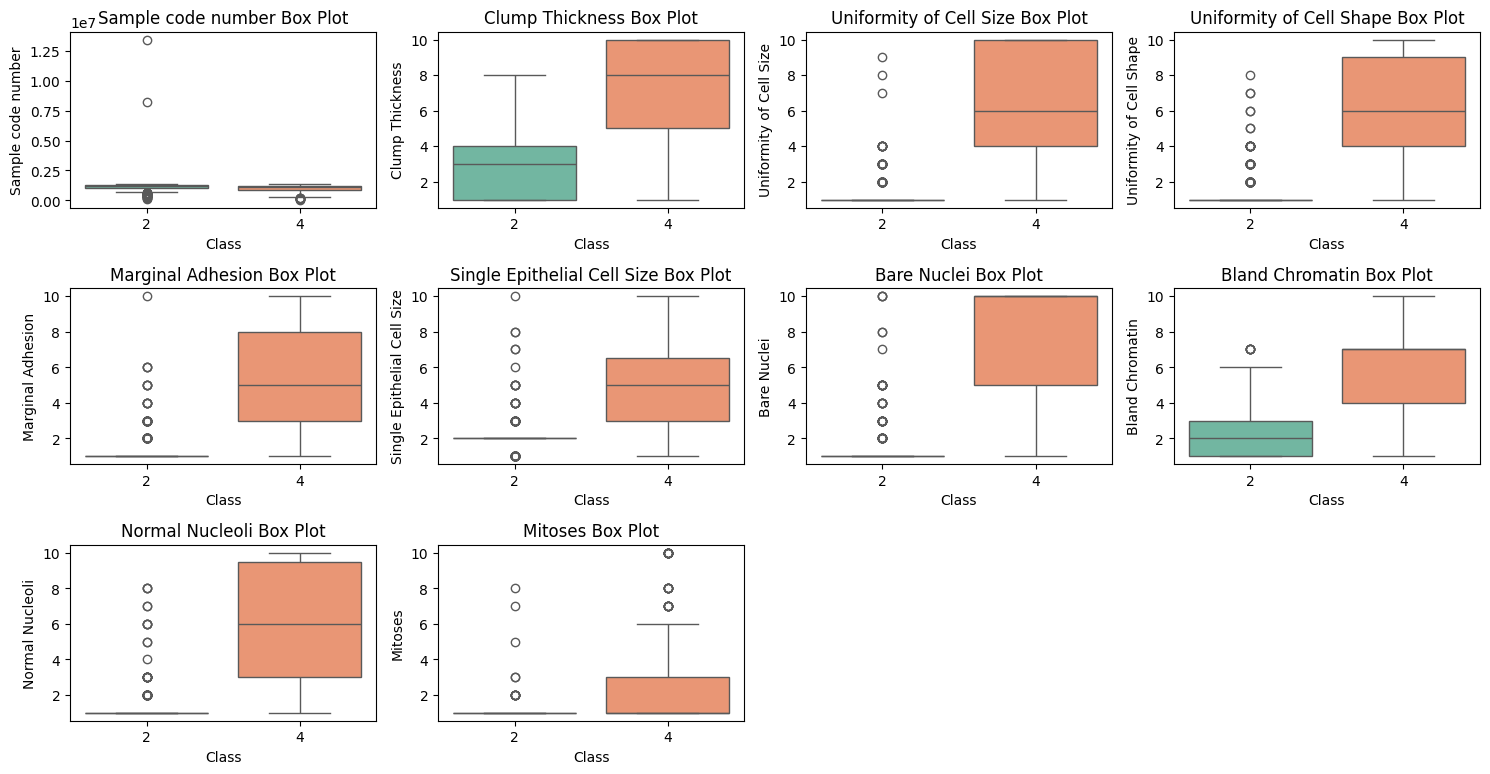

In [11]:
# Her bir özellik için histogram çiz
dataset.hist(bins = 20, figsize = (15, 10), color = 'skyblue')
plt.suptitle('Özelliklerin Histogram Grafiği', fontsize = 16)
plt.tight_layout()
plt.show()

#Sınıf Bazına Box plot Çiz
plt.figure(figsize=(15, 8))
for i, column in enumerate(dataset.columns[:-1]): # Son Sutun Hariç (Class)
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Class', y=column, data=dataset, palette='Set2')
    plt.title(f'{column} Box Plot')
plt.tight_layout()
plt.show()



[[103   4]
 [  3  61]]


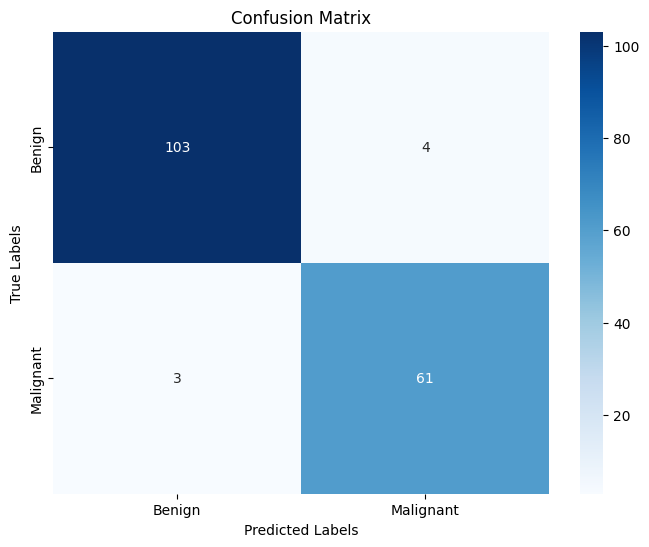

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


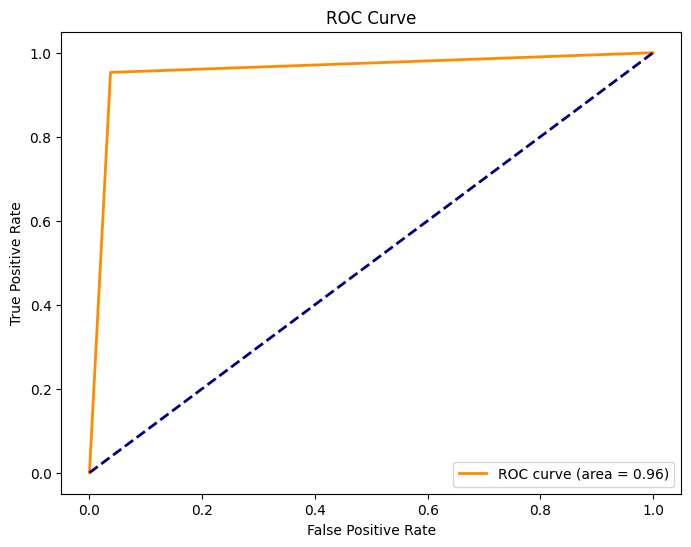

In [16]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

# Hedef değişkeni ikili formata dönüştür
y_train = np.where(y_train == 2, 0, 1)
y_test = np.where(y_test == 2, 0, 1)

# ROC eğrisi için değerleri hesapla
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#ROC Eğrisini Çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
